# Implementing Ollivier-Ricci Curvature with Diffusion EMD

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from DiffusionEMD import DiffusionCheb
from pecan import data
import matplotlib.pyplot as plt
import graphtools
from DiffusionEMD.estimate_utils import l1_distance_matrix

Build the torus and create a graph, along with the accompanying diffusion operator.

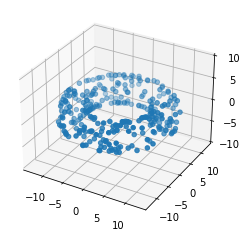

In [27]:
X = data.torus(300,inner_radius=3,outer_radius=10) # make a 500 point torus
# visualize
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.set_zlim(-10,10)
ax.scatter(X[:,0],X[:,1],X[:,2])

In [34]:
G = graphtools.graphs.kNNGraph(X,knn=10)

Calculating KNN search...


In [35]:
P = G.P.toarray()
P_symmetric = G.diff_aff.toarray()
A = G.K.toarray() - np.eye(len(P))

In [36]:
A.tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

Create two distributions on the torus.

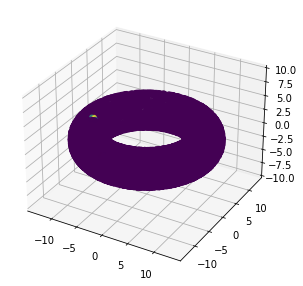

In [7]:
distributions = np.zeros((len(A),2))
distributions[:,0][140] = 1
distributions[:,1][145] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# combined distributions
dists_combined = distributions[0] + distributions[1]

# visualize the result
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,1,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=dists_combined)


# Testing Ollivier-Ricci-DEMD curvature on the donut

## With DEMD Curvature

In [ ]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD
ORC = Ollivier_Ricci_Curvature_DEMD(G) # initialize with a graphtools graph of the torus

Test curvature between various points on the torus

With nice visualizations

In [7]:
i = 50
diffusion_probs = np.linalg.matrix_power(P,3)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# combined distributions
dists_combined = distributions[0] + distributions[1]

# visualize the result
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,1,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=dists_combined)

KeyboardInterrupt: 

## Using Total DEMD Curvature (with DEMD dirac distance as the ground distance)

In [9]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD_Total
ORC = Ollivier_Ricci_Curvature_DEMD_Total(G) # initialize with a graphtools graph of the torus

EMD between diffused diracs is 0.06910739761402201
EMD between diracs is 0.07245732538259944


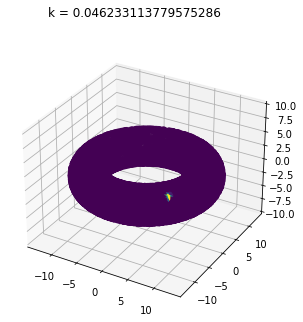

In [11]:
i = 200
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# combined distributions
dists_combined = distributions[0] + distributions[1]

# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,1,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=dists_combined)

EMD between diffused diracs is 0.5120527822872214
EMD between diracs is 0.5095065648908036


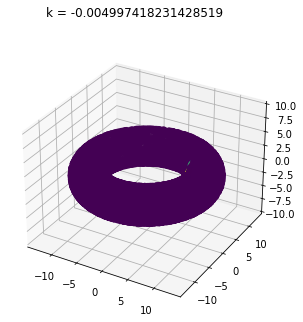

In [12]:
i = 40
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# combined distributions
dists_combined = distributions[0] + distributions[1]

# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,1,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=dists_combined)

EMD between diffused diracs is 0.09289520682039638
EMD between diracs is 0.10485014482678856


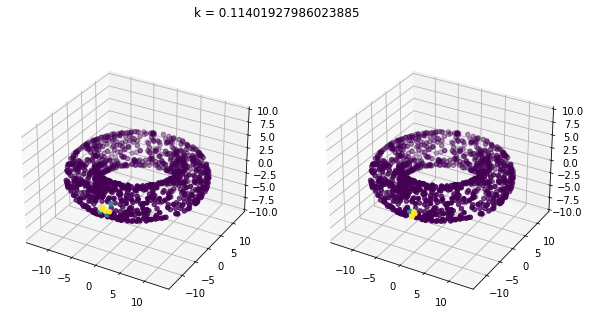

In [21]:
i = 108
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[1])

EMD between diffused diracs is 0.04283680422205803
EMD between diracs is 0.05183107161524391


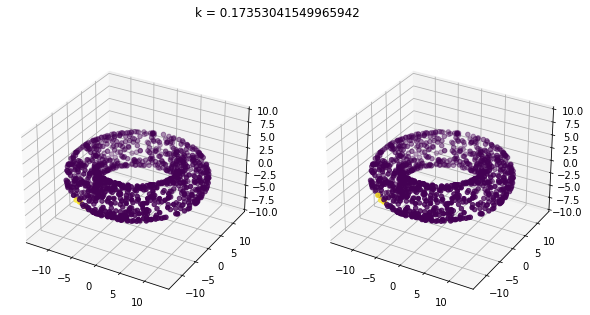

In [36]:
i = 280
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[1])

## Using Regular OT

In [37]:
from pecan.curvature import Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances
ORC_regular = Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances(G,0) # initialize with a graphtools graph of the torus

EMD is 0.35835719285292744
Diffusion distance is 0.41409957900857436


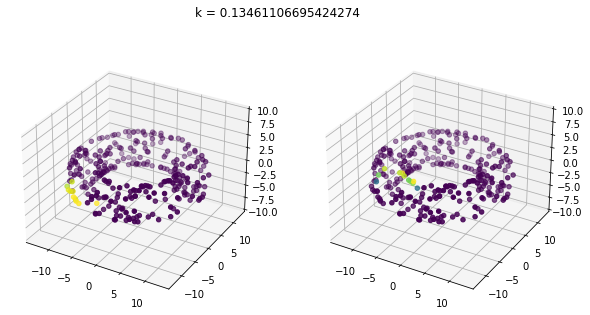

In [38]:
i = 240
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD is 0.0
Diffusion distance is 0.45189665392908107


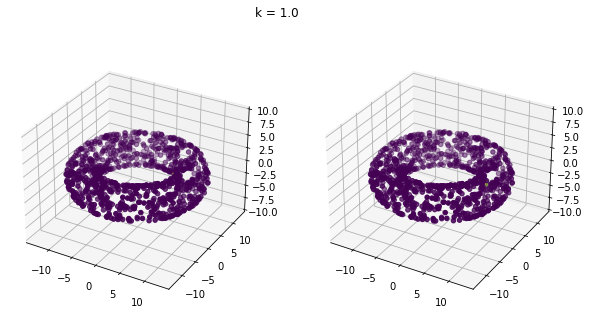

In [49]:
i = 270
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

EMD is 0.0
Diffusion distance is 0.5699714959812837


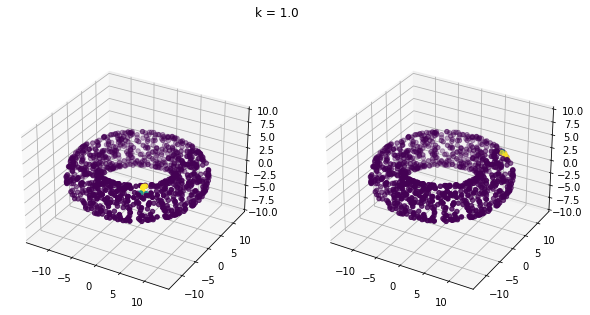

In [89]:
i = 290
diffusion_probs = np.linalg.matrix_power(P,20)[i] # choose a random point within a 3 step random walk
j = 130 #np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(A),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[1])

In [ ]:
distribut

In [90]:
distributions.shape

(2, 1000)

In [92]:
import ot
d = ot.emd2(np.ascontiguousarray(distributions[0]),np.ascontiguousarray(distributions[1]),ORC_regular.diffusion_distance_matrix)
d

0.5477199541236274

# Testing with a planar graph


In [37]:
X = np.mgrid[0:1:0.05, 0:1:0.05].reshape(2,-1).T

In [38]:
GPlanar = graphtools.graphs.kNNGraph(X, knn=4)
P = GPlanar.P.toarray()

Calculating KNN search...


## Using regular OT

In [157]:
from pecan.curvature import Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances
ORC_regular = Ollivier_Ricci_Curvature_Regular_OT_with_Diffusion_Distances(GPlanar,0) # initialize with a graphtools graph of the torus

EMD is 0.0
Diffusion distance is 0.55617264151366


/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/ot/lp/__init__.py:421: UserWarning: Problem infeasible. Check that a and b are in the simplex
  check_result(result_code)


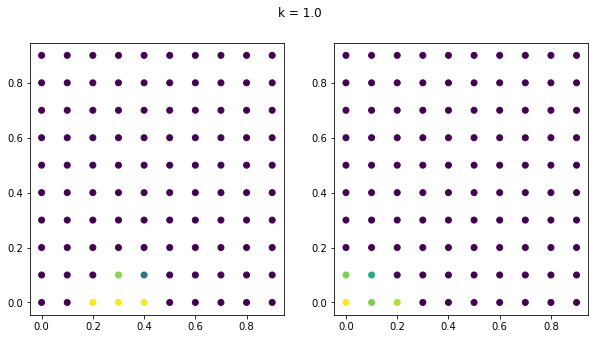

In [158]:
i = 30
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC_regular.curvature_between(i,j)
# make plots
distributions = np.zeros((len(P),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

## With DEMD

In [35]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD
ORC = Ollivier_Ricci_Curvature_DEMD(GPlanar,lp=2) # initialize with a graphtools graph of the torus

DEMD is 0.2324767630061529
Diffusion distance is 0.5631195285791818


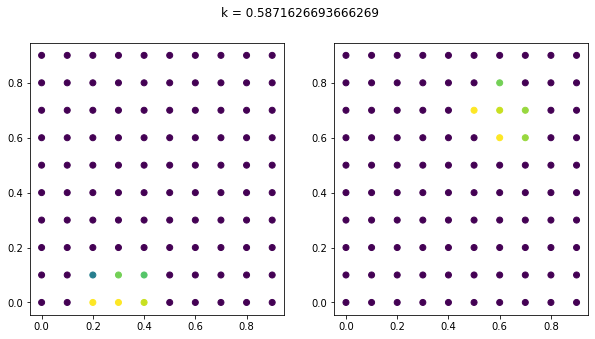

In [36]:
i = 30
diffusion_probs = np.linalg.matrix_power(P,100)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(P),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[:,0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[:,1])

## With DEMD Total

In [39]:
from pecan.curvature import Ollivier_Ricci_Curvature_DEMD_Total
ORC = Ollivier_Ricci_Curvature_DEMD_Total(GPlanar,lp=2) # initialize with a graphtools graph of the torus

EMD between diffused diracs is 0.22998434953191083
EMD between diracs is 0.2812226968245134


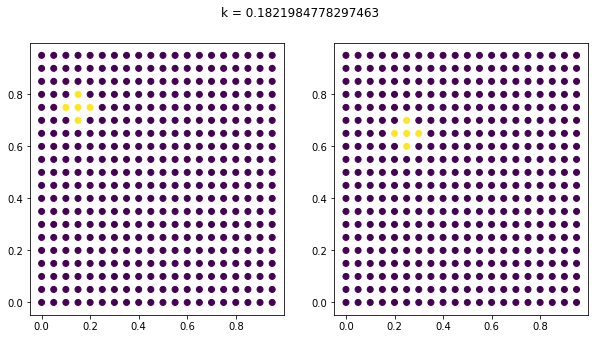

In [45]:
i = 75
diffusion_probs = np.linalg.matrix_power(P,10)[i] # choose a random point within a 3 step random walk
j = np.random.choice(np.arange(0,len(P)), p=diffusion_probs)
k = ORC.curvature_between(i,j)
# make plots
distributions = np.zeros((len(P),2))
distributions[:,0][i] = 1
distributions[:,1][j] = 1
# diffuse the distributions for one step
distributions = distributions.T @ P
# visualize the result
fig = plt.figure(figsize=(10,5))
fig.suptitle(f"k = {k}")
ax1 = plt.subplot(1,2,1)
ax1.scatter(X[:,0],X[:,1],c=distributions[0])
ax2 = plt.subplot(1,2,2)
ax2.scatter(X[:,0],X[:,1],c=distributions[1])